Goal: compare negative binomial distribution with a Irwin-Hall distribution (sum of uniform distributions) to investigate sensitivity to effect size variation.
(The negative binomial distribution assumes identical effect sizes at all non-neutral sites.)


## Preliminaries


In [1]:
from cycler import cycler
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as scipy_stats
import seaborn as sns

from pylib.auxlib._IrwinHallDistribution import IrwinHallDistribution

# nbinom_cdf provides more convenient param convention than scipy nbinom.cdf
from pylib.auxlib._nbinom_cdf import nbinom_cdf


In [2]:
# adapted from https://matplotlib.org/stable/users/explain/artists/color_cycle.html#color-cycle
default_cycler = cycler(color=sns.color_palette()[:8]) + cycler(
    linestyle=["-", "--", ":", "-."] * 2
)

plt.rc("lines", linewidth=2)
plt.rc("axes", prop_cycle=default_cycler)


This code rescales irwin hall output to add a coin flip probability `p` of a site being neutral (i.e., binomial distribution).


In [3]:
def binomcorrect(xs, ys, p):
    # https://stackoverflow.com/a/49282684/17332200
    dist = scipy_stats.binom(
        p=p, n=xs
    )  # probability of n outcomes in x trials
    column_iota = np.atleast_2d(xs).T
    # M[i, j] = probability of j successes in i trials
    M = dist.pmf(k=column_iota)
    # dot with ys to get
    # at each number of trials n,
    # the expected irwin hall sum of k values
    # summed across all possible coin flip outcomes k
    assert np.sum(M, axis=1).all() == 1
    res = np.dot(M.T, ys)
    return res


As a sanity check, these distributions should be identical.


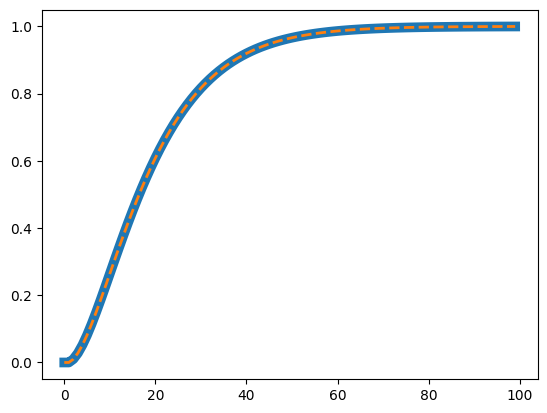

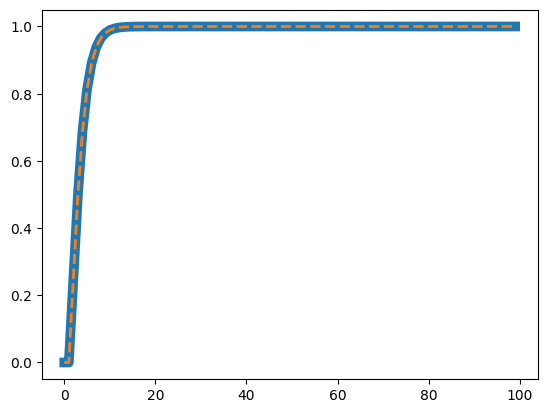

In [4]:
for p in 0.1, 0.5:
    xs = np.arange(100)

    ys1 = [1 - IrwinHallDistribution(x, 0.50, 0.51).cdf(1.0) for x in xs]
    plt.plot(xs, binomcorrect(xs, ys1, p), lw=7)
    plt.plot(xs, nbinom_cdf(xs, 2, p), ls="--")

    plt.show()


## Probability Distribution Visualizations


### Mean effect size 0.5 With Coin Flip Probability 0.1

Including negative binomial distribution.


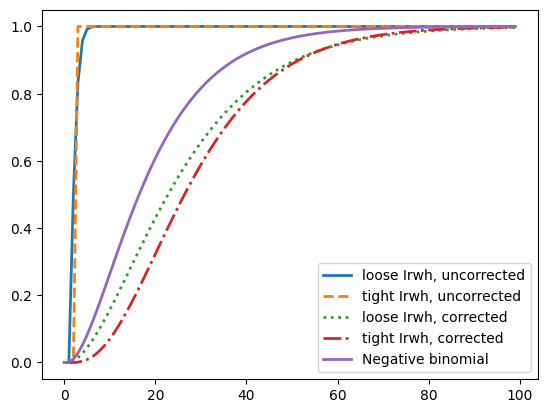

In [5]:
p = 0.1

xs = np.arange(100)

ys1 = [1 - IrwinHallDistribution(x, 0.0, 1.0).cdf(1.0) for x in xs]
ys2 = [1 - IrwinHallDistribution(x, 0.49, 0.5001).cdf(1.0) for x in xs]

plt.plot(xs, ys1, label="loose Irwh, uncorrected")
plt.plot(xs, ys2, label="tight Irwh, uncorrected")
plt.plot(xs, binomcorrect(xs, ys1, p), label="loose Irwh, corrected")
plt.plot(xs, binomcorrect(xs, ys2, p), label="tight Irwh, corrected")
plt.plot(xs, nbinom_cdf(xs, 2, p), label="Negative binomial")
plt.legend()


### Mean effect size 0.5 With Coin Flip Probability 0.5

Including negative binomial distribution.


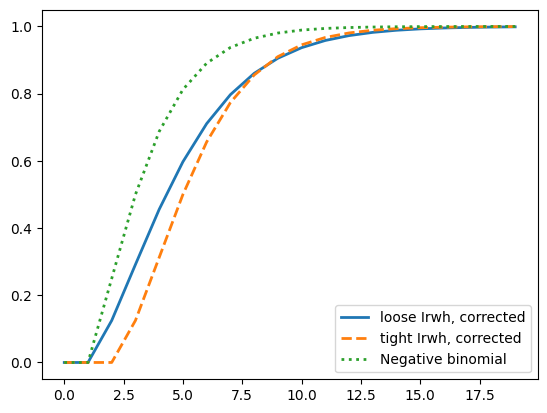

In [6]:
p = 0.5

xs = np.arange(20)
ys1 = [1 - IrwinHallDistribution(x, 0.0, 1.0).cdf(1.0) for x in xs]
ys2 = [1 - IrwinHallDistribution(x, 0.49, 0.5001).cdf(1.0) for x in xs]

plt.plot(xs, binomcorrect(xs, ys1, p), label="loose Irwh, corrected")
plt.plot(xs, binomcorrect(xs, ys2, p), label="tight Irwh, corrected")
plt.plot(xs, nbinom_cdf(xs, 2, p), label="Negative binomial")
plt.legend()


### Mean effect size 0.05 With Coin Flip Probability 0.5

Including negative binomial distribution.


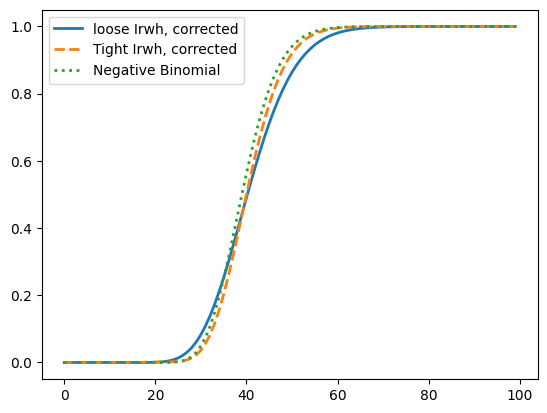

In [7]:
p = 0.5

xs = np.arange(100)
ys1 = [1 - IrwinHallDistribution(x, 0.0, 0.1).cdf(1.0) for x in xs]
ys2 = [1 - IrwinHallDistribution(x, 0.045, 0.055).cdf(1.0) for x in xs]

plt.plot(xs, binomcorrect(xs, ys1, p), label="loose Irwh, corrected")
plt.plot(xs, binomcorrect(xs, ys2, p), label="Tight Irwh, corrected")
plt.plot(xs, nbinom_cdf(xs, 20, p), label="Negative Binomial")
plt.legend()


### Mean effect size 0.05 With Coin Flip Probability 0.2

Including negative binomial distribution.


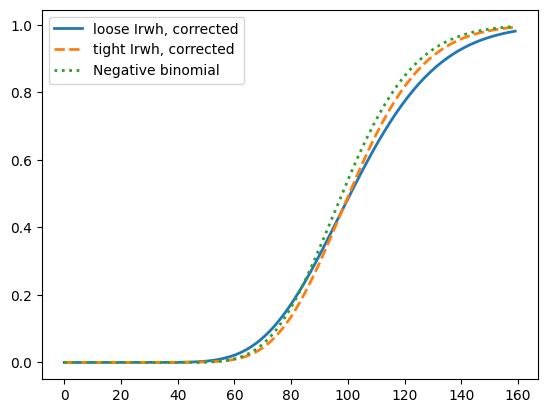

In [8]:
p = 0.2  # can't set lower due to precision issues

xs = np.arange(160)
ys1 = [1 - IrwinHallDistribution(x, 0.0, 0.1).cdf(1.0) for x in xs]
ys2 = [1 - IrwinHallDistribution(x, 0.045, 0.055).cdf(1.0) for x in xs]


plt.plot(xs, binomcorrect(xs, ys1, p), label="loose Irwh, corrected")
plt.plot(xs, binomcorrect(xs, ys2, p), label="tight Irwh, corrected")
plt.plot(xs, nbinom_cdf(xs, 20, p), label="Negative binomial")
plt.legend()
